## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [69]:
import graphviz
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


boston = datasets.load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns = ['MEDV'])

In [2]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [5]:
boston_raw = pd.concat([X, y], axis=1)
boston_a = boston_raw[['RM', 'LSTAT', 'MEDV']].copy()
boston_a.head()

,RM,LSTAT,MEDV
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2


In [6]:
X_a = boston_a.drop(columns = ['MEDV']).copy()
X_a.head()

,RM,LSTAT
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33


In [7]:
y_a = boston_a.loc[:,'MEDV']
y_a.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_a, y_a, random_state=2360873)

In [58]:
regr_a = DecisionTreeRegressor(max_depth=8, min_samples_leaf=10)

regr_a.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=10)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [59]:
path = regr_a.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 1.32431132e-02, 1.81625301e-02, 2.16147757e-02,
        3.08137029e-02, 3.38738406e-02, 3.61900193e-02, 5.57967231e-02,
        5.91275286e-02, 6.53276616e-02, 6.93232740e-02, 9.55247911e-02,
        1.01297376e-01, 2.09054241e-01, 2.58472958e-01, 2.59631392e-01,
        2.66638397e-01, 3.69466432e-01, 4.47497801e-01, 6.84263688e-01,
        1.19694341e+00, 1.84431565e+00, 4.52477476e+00, 5.28170375e+00,
        1.70606107e+01, 4.16718568e+01]),
 'impurities': array([14.61667962, 14.62992273, 14.64808526, 14.66970004, 14.70051374,
        14.73438758, 14.7705776 , 14.82637432, 14.88550185, 14.95082951,
        15.02015279, 15.21120237, 15.31249975, 15.73060823, 15.98908119,
        16.24871258, 16.78198937, 17.1514558 , 17.5989536 , 18.28321729,
        19.4801607 , 21.32447635, 25.84925111, 31.13095486, 48.19156561,
        89.86342242])}

Text(0, 0.5, 'Impureza total das folhas')

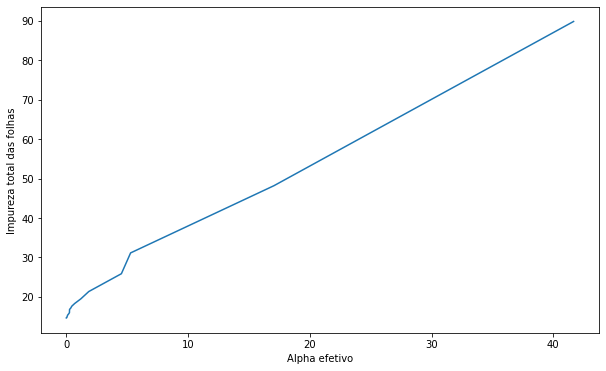

In [60]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [61]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da árvore')

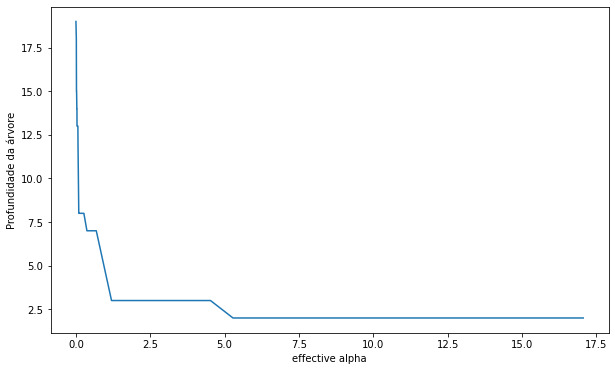

In [62]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [63]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

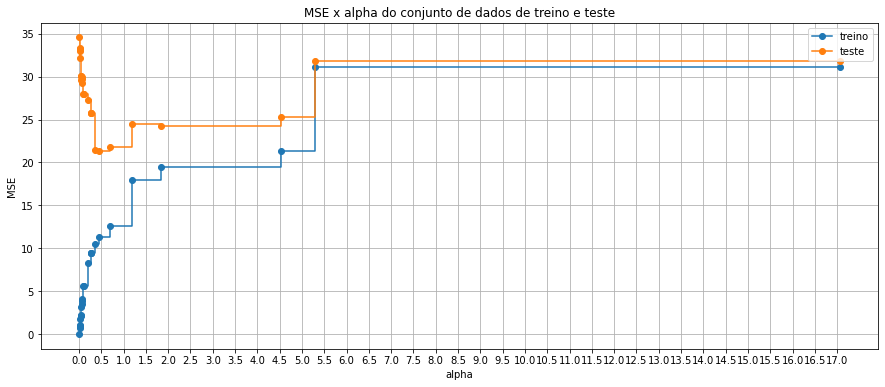

In [64]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
ax.grid()
plt.gcf().set_size_inches(15, 6)
plt.xticks(np.arange(0, 17.5, .5))
plt.show()

Acredito que o valor de Alpha de 0.5 seja um valor interessante.

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [71]:
regr_a = DecisionTreeRegressor(max_depth=8, min_samples_leaf=10, ccp_alpha=0.5)

regr_a.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.5, max_depth=8, min_samples_leaf=10)

In [72]:
regr_a.score(X_train, y_train)

0.804158876544052

### 7. Visualize esta árvore.

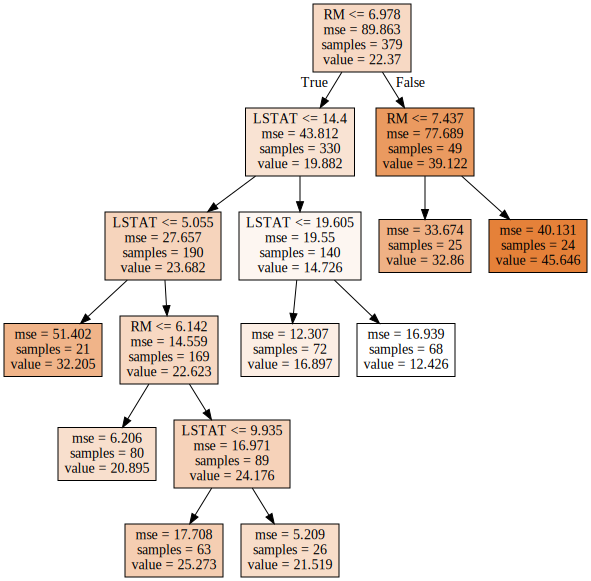

In [73]:
dot_data = tree.export_graphviz(regr_a, out_file=None, 
                                feature_names=X_a.columns,
                                filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph